## Import

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Question: Among disease factors such as (hypertension, heart_disease, bmi, avg_glucose_level), which factor exhibits the strongest association with the likelihood of stroke?
Benefits:

In [101]:
df = pd.read_csv('../data/processed/processed_data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Pre-processing

In [94]:
df['heart_disease'] = df['heart_disease'].map({0:'No', 1:'Yes'}) 
df['hypertension'] = df['hypertension'].map({0:'No', 1:'Yes'}) 

### Analyzing to get the answer

Step 01: Firstly, we need to look at all factors related to diseases

In [113]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 100],labels=['0-20','20-40','40-60','60-100'])
cross_tab = pd.crosstab(df['age_group'],df['stroke'])
probability = cross_tab.div(cross_tab.sum(axis=1),axis=0)

df['comorbidities'] = ((df['hypertension'] == 1).astype(int) +
                             (df['avg_glucose_level'] > 140).astype(int) +
                             (df['heart_disease'] == 1).astype(int) +
                             (df['bmi'] > 30).astype(int))
comorbidities_df = df.groupby(['age_group', 'comorbidities'],observed=True)['stroke'].mean().unstack(fill_value=0)

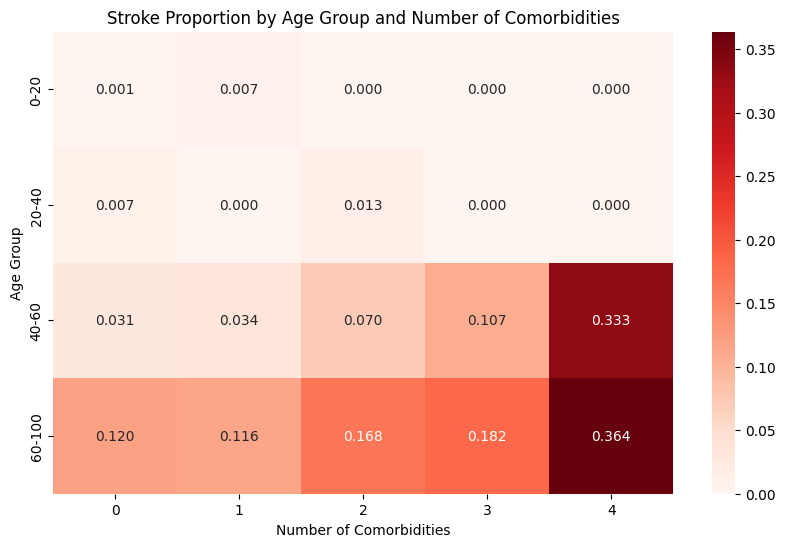

In [114]:
plt.figure(figsize=(10, 6))
sns.heatmap(comorbidities_df,annot=True,cmap='Reds',fmt=".3f")
plt.title('Stroke Proportion by Age Group and Number of Comorbidities')
plt.ylabel('Age Group')
plt.xlabel('Number of Comorbidities')
plt.show()

In [108]:
strokes_df = df[df['stroke'] == 1]

In [109]:
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
strokes_df['bmi_group'] = pd.cut(strokes_df['bmi'], bins=bins, labels=labels)

In [111]:
bins = [0, 140, 200, float('inf')]
labels = ['Normal', 'Prediabetes', 'Diabetes']
strokes_df['avg_glucose_level_group'] = pd.cut(strokes_df['avg_glucose_level'], bins=bins, labels=labels)

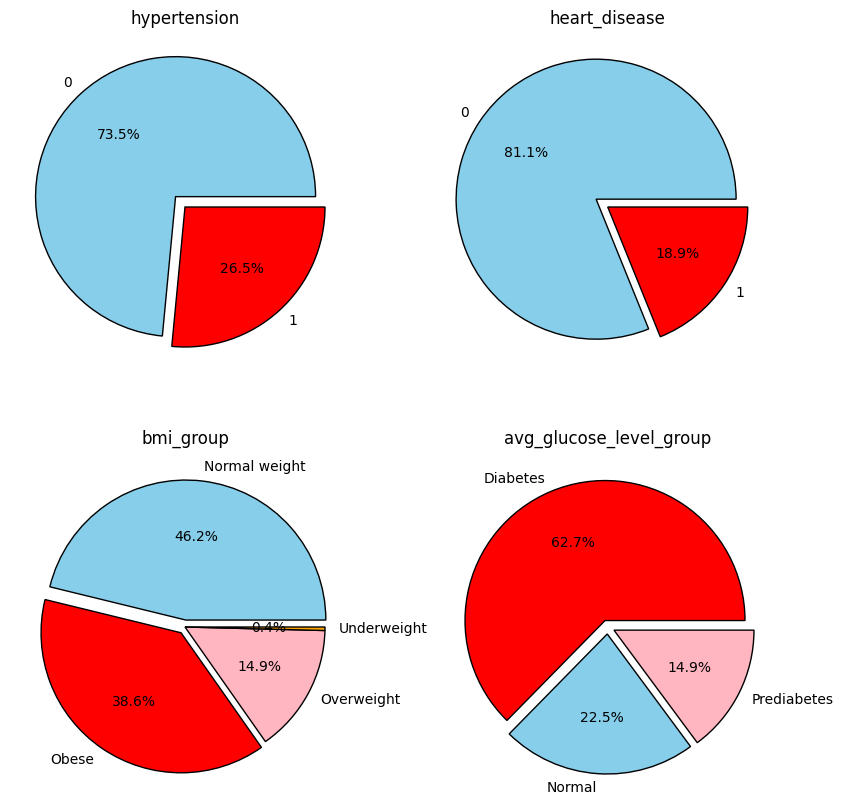

In [117]:
l1 = ['hypertension', 'heart_disease', 'bmi_group', 'avg_glucose_level_group']
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in range(2):
    axs[0][i].pie(strokes_df[l1[i]].value_counts(), labels=sorted(strokes_df[l1[i]].unique()), explode=[0.1, 0], 
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, colors=["skyblue", "red"], autopct="%1.1f%%")
    axs[0][i].set_title(l1[i])

axs[1][0].pie(strokes_df[l1[2]].value_counts(), labels=sorted(strokes_df[l1[2]].unique()), explode=[0.05, 0.05, 0, 0], 
            wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, colors=["skyblue", "red", "lightpink", "orange"], autopct="%1.1f%%")
axs[1][0].set_title(l1[2])

axs[1][1].pie(strokes_df[l1[3]].value_counts(), labels=sorted(strokes_df[l1[3]].unique()), explode=[0.05, 0.05, 0.05], 
            wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, colors=["red", "skyblue", "lightpink"], autopct="%1.1f%%")
axs[1][1].set_title(l1[3])

plt.show()